Heart Disease Prediction Using logistic Regression

# Importing the necessary Packages

In [12]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns


In [13]:
disease_df = pd.read_csv("framingham.csv")
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)

In [14]:
disease_df.head()



,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [15]:
disease_df.shape

(4240, 15)

In [16]:
# dataset
disease_df = pd.read_csv("framingham.csv")
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)


In [17]:
# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())


   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


C:\Users\gener\AppData\Local\Temp\ipykernel_17856\1659565957.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df, palette="BuGn_r")


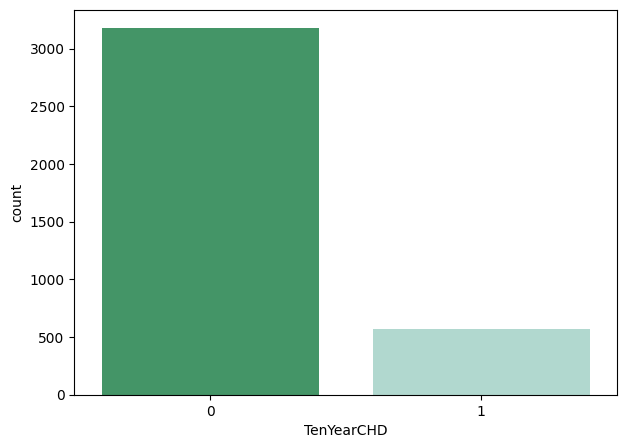

Accuracy of KNN model: 0.8303730017761989


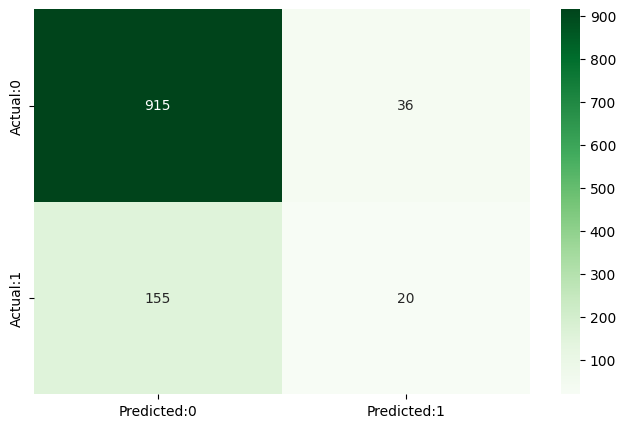

Classification report for KNN model:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       951
           1       0.36      0.11      0.17       175

    accuracy                           0.83      1126
   macro avg       0.61      0.54      0.54      1126
weighted avg       0.78      0.83      0.79      1126



In [18]:
# Feature selection
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# Normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

# Counting no. of patients affected with CHD
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df, palette="BuGn_r")
plt.show()

# K-Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier

# Train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy of KNN model:', accuracy_knn)

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_knn = pd.DataFrame(data=cm_knn, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap="Greens")
plt.show()

# Classification report
print('Classification report for KNN model:')
print(classification_report(y_test, y_pred_knn))
